# Proyecto Final ML
#### LTIC-0316: Sistemas basados en conocimiento

#### Semestre 2023-II
 
#### ENES-Morelia, UNAM
 
 * Arely Hilda Luis Tiburcio
 * Débora Joselyn Tolentino Díaz
 
 
 #### Dataset a utilizar: 
 https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt

## Análisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('16P.csv', encoding="cp1252")

Se cambian los nombres de las columnas por números
Quedan en el diccionario la pregunta como llave y el número asociado como valor.

In [3]:
nwnms = dict(zip(df.columns,range(len(df.columns)))) # Diccionario de preguntas
nwnms['Personality'] = 'Personality'
df.rename(columns = nwnms,inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [4]:
# Se ve la información
# No hay datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   0            59999 non-null  int64 
 1   1            59999 non-null  int64 
 2   2            59999 non-null  int64 
 3   3            59999 non-null  int64 
 4   4            59999 non-null  int64 
 5   5            59999 non-null  int64 
 6   6            59999 non-null  int64 
 7   7            59999 non-null  int64 
 8   8            59999 non-null  int64 
 9   9            59999 non-null  int64 
 10  10           59999 non-null  int64 
 11  11           59999 non-null  int64 
 12  12           59999 non-null  int64 
 13  13           59999 non-null  int64 
 14  14           59999 non-null  int64 
 15  15           59999 non-null  int64 
 16  16           59999 non-null  int64 
 17  17           59999 non-null  int64 
 18  18           59999 non-null  int64 
 19  19           59999 non-nu

In [5]:
# Se clasificará en 16 Personalidades 
df.Personality.nunique()

16

In [6]:
df.Personality.value_counts()

ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: Personality, dtype: int64

Vemos que estan balanceados

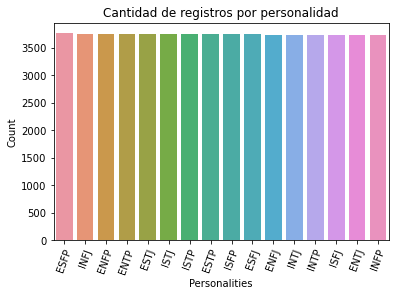

In [7]:
Pers = ['ESFP','INFJ','ENFP','ENTP','ESTJ','ISTJ','ISTP','ESTP','ISFP','ESFJ','ENFJ','INTJ','INTP','ISFJ','ENTJ','INFP']
count = [i for i in df.Personality.value_counts()]

sns.barplot(x=Pers, y =count)
plt.xlabel("Personalities")
plt.ylabel("Count")
plt.title("Cantidad de registros por personalidad")
plt.xticks(rotation=70)
plt.show()

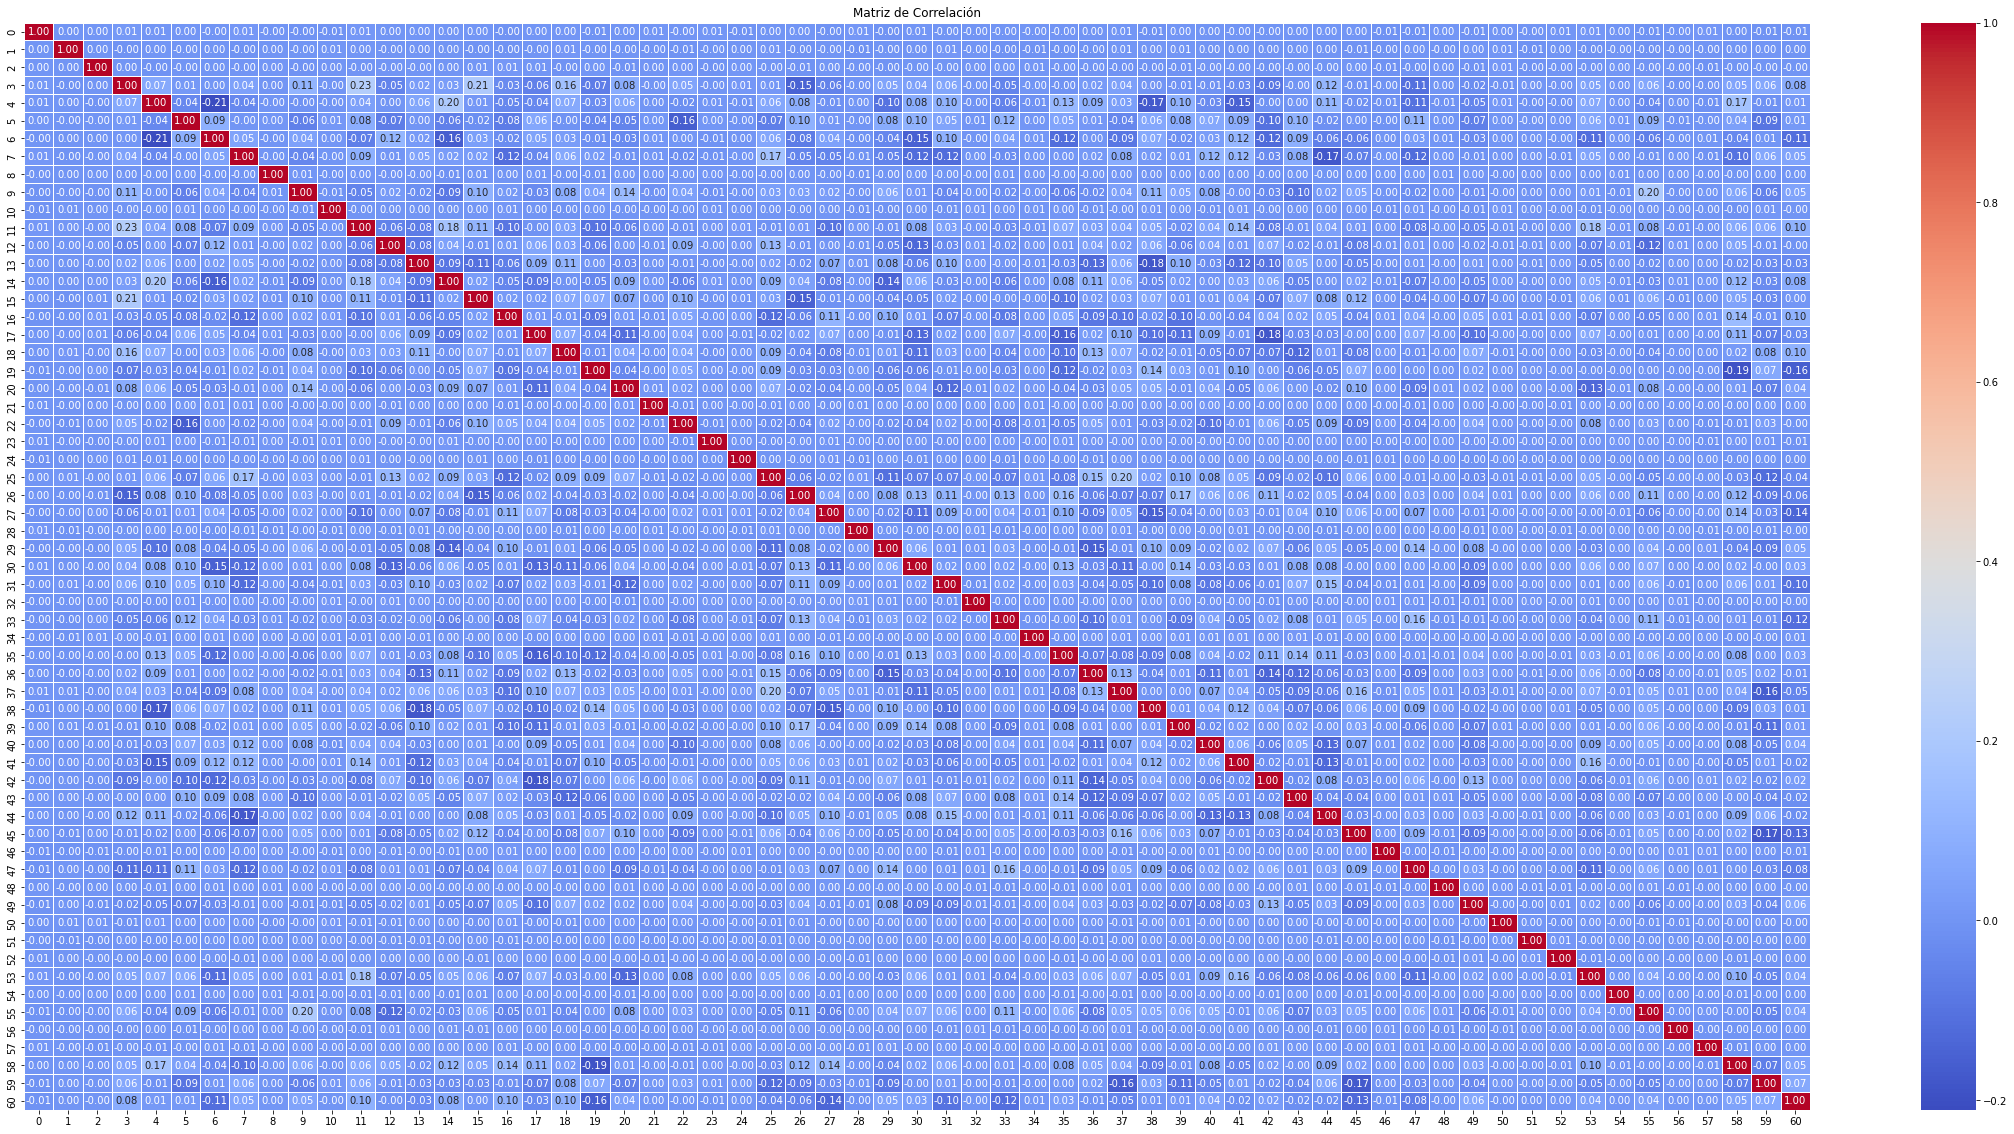

In [8]:
# Matriz de correlación
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(), annot=True,  cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

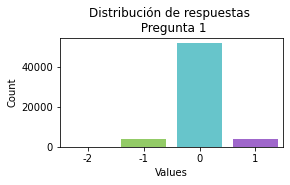

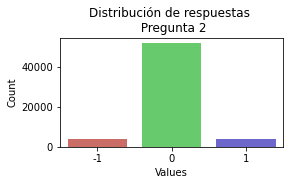

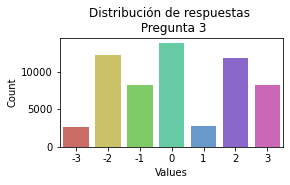

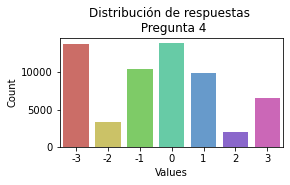

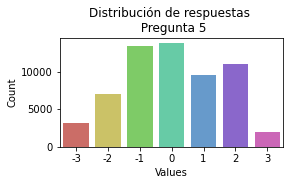

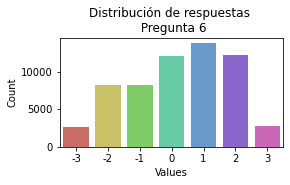

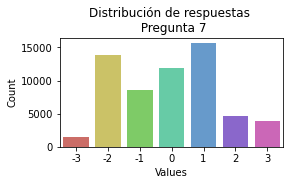

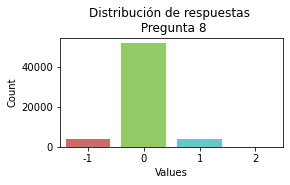

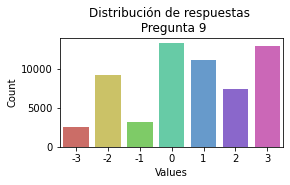

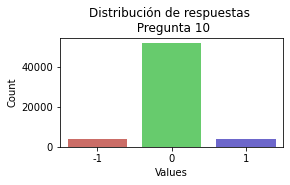

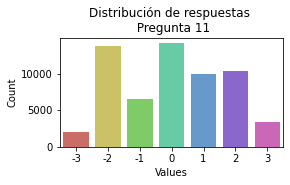

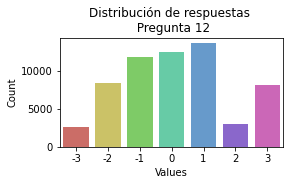

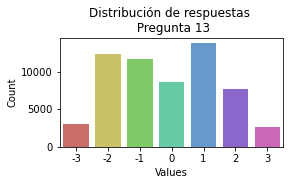

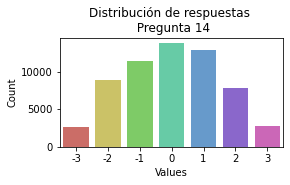

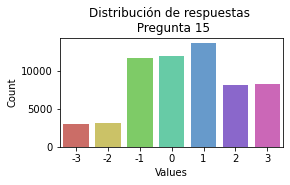

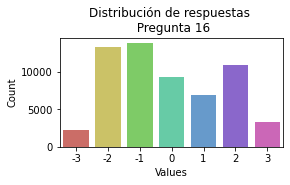

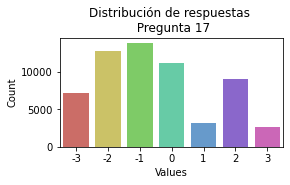

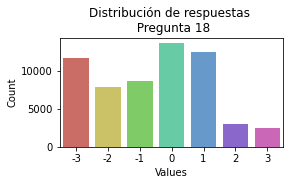

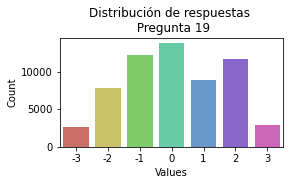

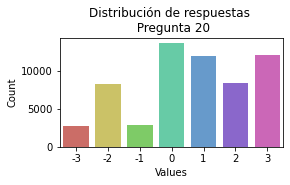

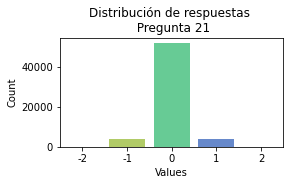

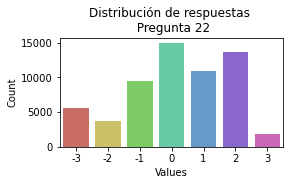

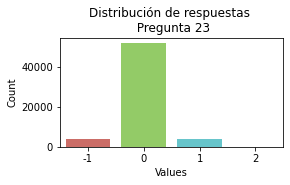

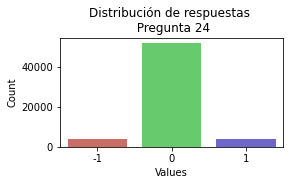

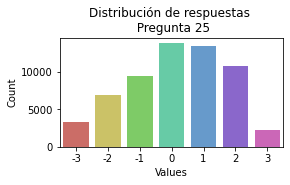

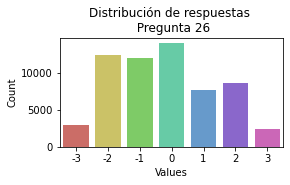

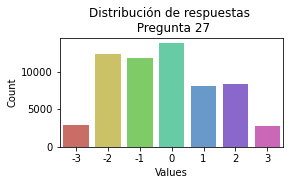

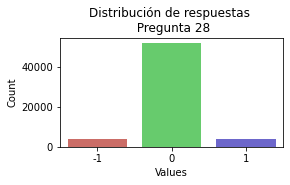

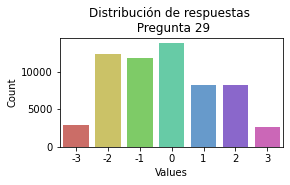

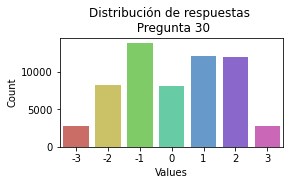

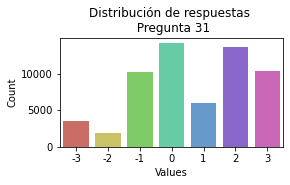

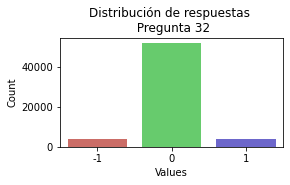

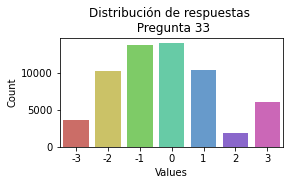

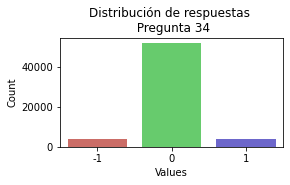

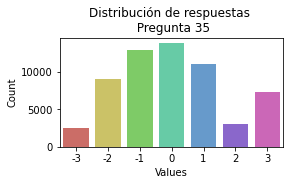

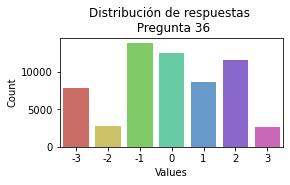

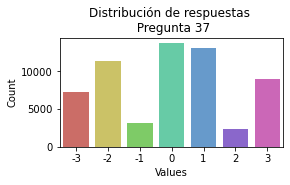

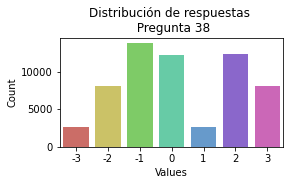

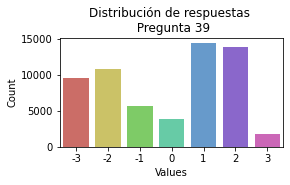

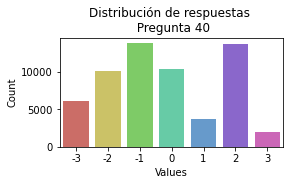

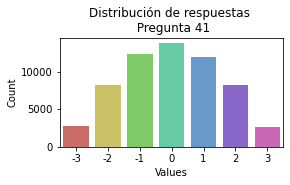

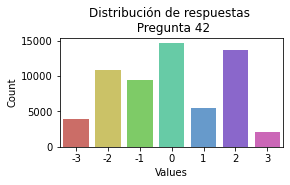

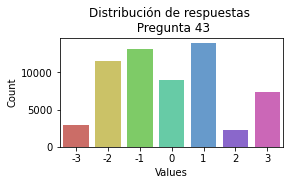

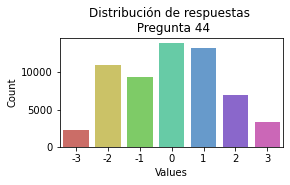

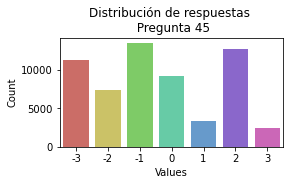

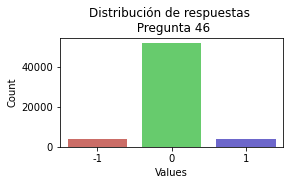

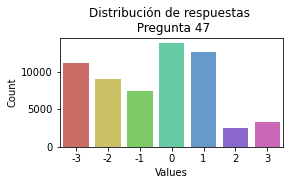

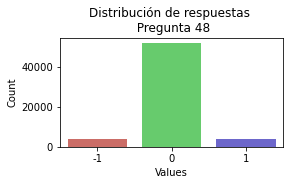

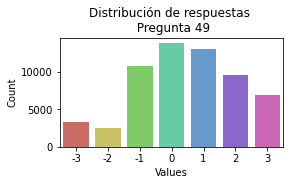

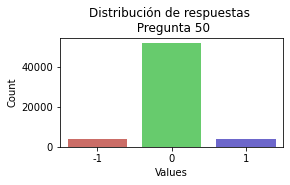

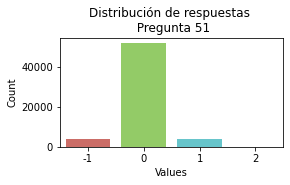

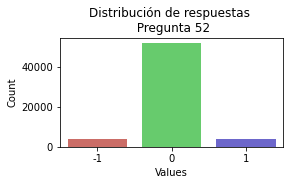

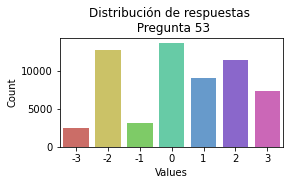

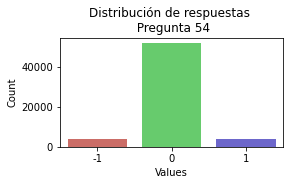

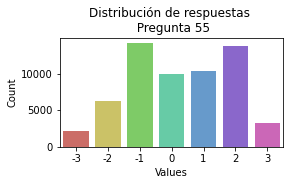

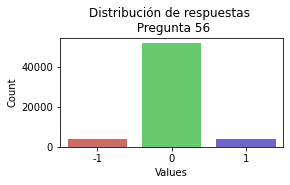

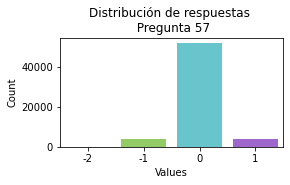

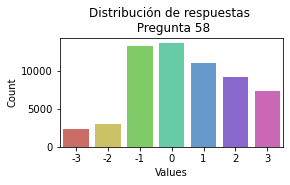

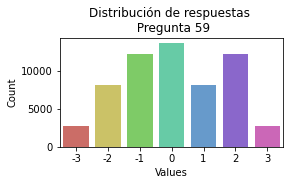

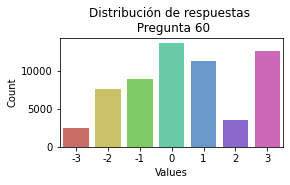

In [9]:
# Gráficas de barras, una por pregunta, donde se ve la distribución de las respuestas 
for i in df.columns[1:-1]:
    plt.figure(figsize=(4, 2))
    sns.barplot(x= df[i].unique(), y=df[i].value_counts(), palette ='hls')
    plt.xlabel("Values")
    plt.ylabel("Count")
    plt.title("Distribución de respuestas \n Pregunta " + str(i))
    plt.show()

## Aplicación de métodos de Aprendizaje Supervisado

#### Clasificadores a utilizar:

* Regresión Logística
* Maquinas de Soporte Vectorial
* KNN
* Árboles de Decisión

In [10]:
x = df.drop([0,'Personality'], axis = 1).add(3)
y = df.Personality

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Naive Bayes

In [43]:
from sklearn.naive_bayes import CategoricalNB
NB = CategoricalNB()
NB.fit(x_train, y_train)
nb_pred = NB.predict(x_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

        ENFJ       0.90      0.94      0.92       937
        ENFP       0.92      0.95      0.93       938
        ENTJ       0.94      0.97      0.95       915
        ENTP       0.95      0.93      0.94       906
        ESFJ       0.86      0.80      0.83       980
        ESFP       0.95      0.93      0.94       920
        ESTJ       0.92      0.95      0.93       949
        ESTP       0.92      0.95      0.93       916
        INFJ       0.90      0.91      0.90       911
        INFP       0.90      0.88      0.89       967
        INTJ       0.87      0.92      0.89       934
        INTP       0.88      0.91      0.89       959
        ISFJ       0.88      0.88      0.88       950
        ISFP       0.93      0.89      0.91       894
        ISTJ       0.93      0.84      0.89       973
        ISTP       0.90      0.93      0.91       951

    accuracy                           0.91     15000
   macro avg       0.91   

#### Validación cruzada

In [71]:
metrics = ['accuracy','recall_micro','precision_micro','f1_micro']
print('Cross Validation:')
for m in metrics:
    scores = np.array([i for i in cross_val_score(NB, x, y, cv=6,scoring = m) if i <= 1])
    print(m,' = ', scores.mean())

Cross Validation:
accuracy  =  0.9101636663666367
recall_micro  =  0.9101636663666367
precision_micro  =  0.9101636663666367
f1_micro  =  0.9101636663666367


#### Matriz de confusión

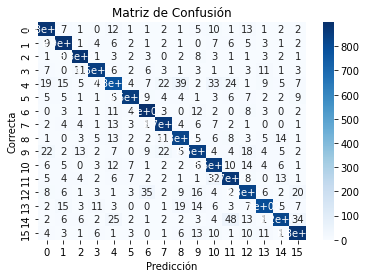

In [46]:
mc = confusion_matrix(y_test, nb_pred)
sns.heatmap(mc, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Correcta")
plt.title("Matriz de Confusión")
plt.show()

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0,max_iter = 700)
LR.fit(x_train, y_train)
LR_pred = LR.predict(x_test)

In [13]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

        ENFJ       0.92      0.93      0.92       937
        ENFP       0.93      0.93      0.93       938
        ENTJ       0.95      0.96      0.95       915
        ENTP       0.94      0.94      0.94       906
        ESFJ       0.88      0.85      0.86       980
        ESFP       0.93      0.94      0.94       920
        ESTJ       0.93      0.93      0.93       949
        ESTP       0.93      0.94      0.94       916
        INFJ       0.90      0.92      0.91       911
        INFP       0.90      0.89      0.90       967
        INTJ       0.87      0.92      0.90       934
        INTP       0.91      0.91      0.91       959
        ISFJ       0.90      0.87      0.89       950
        ISFP       0.92      0.91      0.91       894
        ISTJ       0.91      0.89      0.90       973
        ISTP       0.91      0.93      0.92       951

    accuracy                           0.92     15000
   macro avg       0.92   

#### Validación cruzada

In [14]:
metrics = ['accuracy','recall_macro','precision_macro','f1_macro']
print('Cross Validation:')
for m in metrics:
    print(m,' = ',cross_val_score(LR, x, y, cv=5,scoring = m).mean())

Cross Validation:
accuracy  =  0.9176319346056616
recall_macro  =  0.9176063133109595
precision_macro  =  0.9177207104893832
f1_macro  =  0.9175872629373737


#### Matriz de confusión

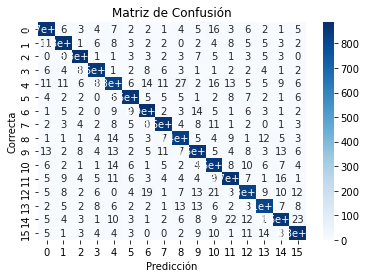

In [15]:
mc = confusion_matrix(y_test, LR_pred)
sns.heatmap(mc, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Correcta")
plt.title("Matriz de Confusión")
plt.show()

### MSV

#### Linear, Poly y rbf

In [16]:
from sklearn.svm import SVC
kernels = ['linear','poly','rbf']
for k in kernels:
    SVM = SVC(kernel = k)
    SVM.fit(x_train,y_train)
    SVM_pred = SVM.predict(x_test)
    print('SVC:',k,'\n',classification_report(y_test, SVM_pred))

SVC: linear 
               precision    recall  f1-score   support

        ENFJ       0.94      0.96      0.95       937
        ENFP       0.94      0.96      0.95       938
        ENTJ       0.96      0.97      0.97       915
        ENTP       0.96      0.96      0.96       906
        ESFJ       0.91      0.94      0.92       980
        ESFP       0.96      0.95      0.95       920
        ESTJ       0.96      0.95      0.96       949
        ESTP       0.95      0.95      0.95       916
        INFJ       0.93      0.95      0.94       911
        INFP       0.94      0.94      0.94       967
        INTJ       0.92      0.93      0.93       934
        INTP       0.96      0.93      0.94       959
        ISFJ       0.94      0.92      0.93       950
        ISFP       0.94      0.93      0.94       894
        ISTJ       0.95      0.92      0.94       973
        ISTP       0.95      0.93      0.94       951

    accuracy                           0.94     15000
   macro avg

#### sigmoid

In [17]:
#SVCs = SVC(kernel = "sigmoid")
#SVCs.fit(x_train,y_train)
#SVMs_pred = SVCs.predict(x_test)
#accuracy_score(y_test, SVMs_pred)

#### Validación cruzada

In [18]:
metrics = ['accuracy','recall_macro','precision_macro','f1_macro']
print('Cross Validation:')
SVM = SVC(kernel = 'rbf')
for m in metrics:
    print(m,' = ',cross_val_score(SVM, x, y, cv=5,scoring = m).mean())

Cross Validation:
accuracy  =  0.9887998013723365
recall_macro  =  0.9888018506975289
precision_macro  =  0.9888152120393695
f1_macro  =  0.9887994965898216


#### Matriz de confusión

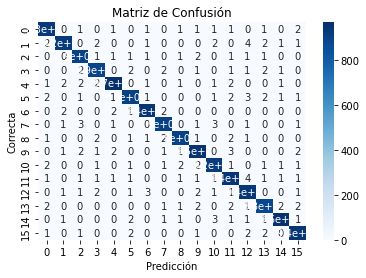

In [19]:
mc = confusion_matrix(y_test, SVM_pred)
sns.heatmap(mc, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Correcta")
plt.title("Matriz de Confusión")
plt.show()

### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
k_f1 = []
kRange = range(1,18) # Se buscará la mejor k
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k,p=2) # Utilizando distancia euclidiana p=2
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    k_f1.append(f1_score(y_test,knn_pred, average = 'macro'))
    acc.append(accuracy_score(y_test, knn_pred))
list(zip(kRange,k_f1,acc))

[(1, 0.9765516420206108, 0.9765333333333334),
 (2, 0.9743223866980486, 0.9743333333333334),
 (3, 0.9866727004820174, 0.9866666666666667),
 (4, 0.9870071576530819, 0.987),
 (5, 0.9874769728155429, 0.9874666666666667),
 (6, 0.9877984580936006, 0.9878),
 (7, 0.9879338317151898, 0.9879333333333333),
 (8, 0.9878655454453767, 0.9878666666666667),
 (9, 0.9880029217169671, 0.988),
 (10, 0.9877379831223121, 0.9877333333333334),
 (11, 0.9878706084401098, 0.9878666666666667),
 (12, 0.9877379021641222, 0.9877333333333334),
 (13, 0.9877395766212137, 0.9877333333333334),
 (14, 0.9878708881988796, 0.9878666666666667),
 (15, 0.9878062615052047, 0.9878),
 (16, 0.9879357756855562, 0.9879333333333333),
 (17, 0.9878709422459384, 0.9878666666666667)]

In [22]:
btrk =  dict(zip(k_f1,kRange))
k = btrk[max(btrk.keys())] #Se consigue la k más optima para usarla en la validación cruzada

In [23]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

        ENFJ       0.99      0.99      0.99       937
        ENFP       0.99      0.98      0.99       938
        ENTJ       0.99      0.99      0.99       915
        ENTP       0.99      0.99      0.99       906
        ESFJ       0.99      0.98      0.99       980
        ESFP       0.99      0.98      0.99       920
        ESTJ       0.99      0.99      0.99       949
        ESTP       0.99      0.99      0.99       916
        INFJ       0.99      0.99      0.99       911
        INFP       0.98      0.99      0.99       967
        INTJ       0.99      0.99      0.99       934
        INTP       0.98      0.99      0.98       959
        ISFJ       0.98      0.99      0.98       950
        ISFP       0.99      0.99      0.99       894
        ISTJ       0.99      0.99      0.99       973
        ISTP       0.99      0.99      0.99       951

    accuracy                           0.99     15000
   macro avg       0.99   

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=7,p=2) # Utilizando distancia manhattan p=1
knn1.fit(x_train,y_train)
knn1_pred = knn1.predict(x_test)
print(classification_report(y_test, knn1_pred))

              precision    recall  f1-score   support

        ENFJ       0.99      0.99      0.99       937
        ENFP       0.99      0.98      0.99       938
        ENTJ       0.99      0.99      0.99       915
        ENTP       0.99      0.99      0.99       906
        ESFJ       0.99      0.99      0.99       980
        ESFP       0.99      0.98      0.98       920
        ESTJ       0.99      0.99      0.99       949
        ESTP       0.99      0.99      0.99       916
        INFJ       0.99      0.99      0.99       911
        INFP       0.99      0.99      0.99       967
        INTJ       0.99      0.99      0.99       934
        INTP       0.98      0.99      0.98       959
        ISFJ       0.98      0.99      0.98       950
        ISFP       0.99      0.99      0.99       894
        ISTJ       0.99      0.99      0.99       973
        ISTP       0.99      0.99      0.99       951

    accuracy                           0.99     15000
   macro avg       0.99   

In [25]:
knn2 = KNeighborsClassifier(n_neighbors=7,p=2) # Utilizando distancia euclidiana p=2
knn2.fit(x_train,y_train)
knn2_pred = knn2.predict(x_test)
print(classification_report(y_test, knn2_pred))

              precision    recall  f1-score   support

        ENFJ       0.99      0.99      0.99       937
        ENFP       0.99      0.98      0.99       938
        ENTJ       0.99      0.99      0.99       915
        ENTP       0.99      0.99      0.99       906
        ESFJ       0.99      0.99      0.99       980
        ESFP       0.99      0.98      0.98       920
        ESTJ       0.99      0.99      0.99       949
        ESTP       0.99      0.99      0.99       916
        INFJ       0.99      0.99      0.99       911
        INFP       0.99      0.99      0.99       967
        INTJ       0.99      0.99      0.99       934
        INTP       0.98      0.99      0.98       959
        ISFJ       0.98      0.99      0.98       950
        ISFP       0.99      0.99      0.99       894
        ISTJ       0.99      0.99      0.99       973
        ISTP       0.99      0.99      0.99       951

    accuracy                           0.99     15000
   macro avg       0.99   

#### Validación cruzada

In [27]:
metrics = ['accuracy','recall_macro','precision_macro','f1_macro']
print('Cross Validation:')
knn = KNeighborsClassifier(n_neighbors= k, p=2)
for m in metrics:
    print(m,' = ',cross_val_score(knn, x, y, cv=5,scoring = m).mean())

Cross Validation:
accuracy  =  0.989283149984721
recall_macro  =  0.9892856514469035
precision_macro  =  0.9892999684991528
f1_macro  =  0.9892837140936726


#### Matriz de confusión

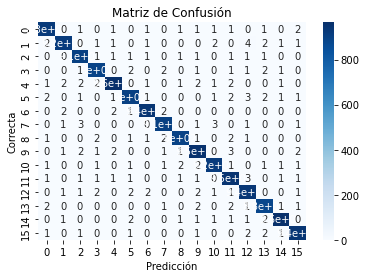

In [29]:
mc = confusion_matrix(y_test, knn_pred)
sns.heatmap(mc, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Correcta")
plt.title("Matriz de Confusión")
plt.show()

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # Gini
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

        ENFJ       0.64      0.66      0.65       937
        ENFP       0.64      0.65      0.65       938
        ENTJ       0.68      0.67      0.67       915
        ENTP       0.62      0.65      0.63       906
        ESFJ       0.60      0.59      0.59       980
        ESFP       0.64      0.65      0.65       920
        ESTJ       0.64      0.67      0.65       949
        ESTP       0.66      0.66      0.66       916
        INFJ       0.62      0.64      0.63       911
        INFP       0.68      0.62      0.65       967
        INTJ       0.62      0.62      0.62       934
        INTP       0.65      0.60      0.62       959
        ISFJ       0.62      0.62      0.62       950
        ISFP       0.61      0.64      0.62       894
        ISTJ       0.62      0.61      0.62       973
        ISTP       0.63      0.64      0.64       951

    accuracy                           0.64     15000
   macro avg       0.64   

In [38]:
dt2 = DecisionTreeClassifier(criterion='entropy') # Entropy
dt2.fit(x_train, y_train)
dt2_pred = dt2.predict(x_test)
print(classification_report(y_test, dt2_pred))

              precision    recall  f1-score   support

        ENFJ       0.68      0.67      0.67       937
        ENFP       0.68      0.64      0.66       938
        ENTJ       0.67      0.68      0.67       915
        ENTP       0.68      0.67      0.67       906
        ESFJ       0.66      0.66      0.66       980
        ESFP       0.68      0.66      0.67       920
        ESTJ       0.63      0.66      0.65       949
        ESTP       0.66      0.68      0.67       916
        INFJ       0.66      0.66      0.66       911
        INFP       0.63      0.61      0.62       967
        INTJ       0.63      0.64      0.63       934
        INTP       0.65      0.64      0.65       959
        ISFJ       0.63      0.63      0.63       950
        ISFP       0.60      0.66      0.63       894
        ISTJ       0.68      0.66      0.67       973
        ISTP       0.67      0.65      0.66       951

    accuracy                           0.65     15000
   macro avg       0.65   

#### Validación cruzada

In [34]:
metrics = ['accuracy','recall_macro','precision_macro','f1_macro']
print('Cross Validation:')
for m in metrics:
    print(m,' = ',cross_val_score(dt, x, y, cv=5,scoring = m).mean())

Cross Validation:
accuracy  =  0.6473773453343334
recall_macro  =  0.6488681179454721
precision_macro  =  0.6493790188906239
f1_macro  =  0.6475932326397805


#### Matriz de confusión

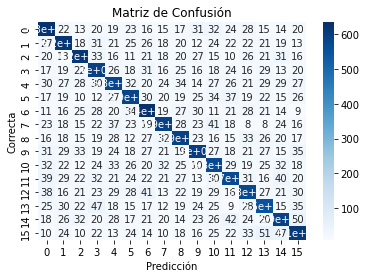

In [35]:
mc = confusion_matrix(y_test, dt_pred)
sns.heatmap(mc, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Correcta")
plt.title("Matriz de Confusión")
plt.show()